# Logistic Regression from scratch

The goal of this notebook is to demonstrate the linear regression model made from scratch using numpy.

## Sigmoid function

This function will calculate the following formula given an input $z$

$$ \displaystyle
A = g(z) = \frac{1}{1+e^{-z}}
$$

where

$$z = x \cdot w$$

## Cost function
Now we are going to code the cost function. Remember that,

$$
\displaystyle
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(a^{(i)},y^{(i)})
$$

given
$$
L(a,y) = -\left[ y \log a + (1-y) \log (1-a) \right]
$$

## Gradient calculation.
Let us now calculate the gradient function following its matrix expression.

$$
\displaystyle
\nabla_w (J(w)) = \frac{1}{m} X^T (A-y)
$$



In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                centers=2,
                random_state=10,
                cluster_std=3)

#### Import the data

In [101]:
m, n = X.shape

print(f"Num features is {n}")
print(f"Num samples is {m}")

Num features is 2
Num samples is 200


In [102]:
y = y.reshape(-1,1)

Let's plot the data.

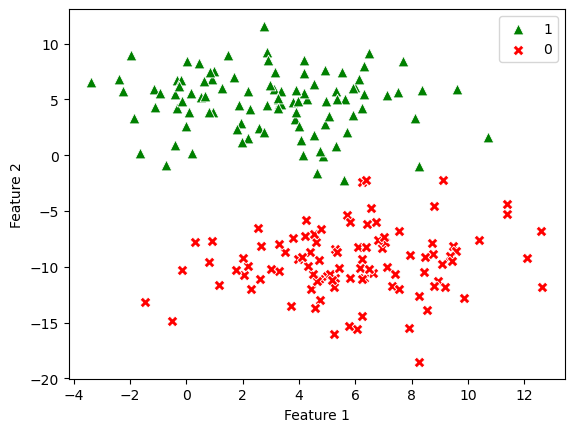

In [103]:
class1 = (y == 1).reshape(-1, 1)
class0 = (y == 0).reshape(-1, 1)

ax = sns.scatterplot(x = X[class1[:, 0], 0],
                     y = X[class1[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = X[class0[:, 0], 0],
                y = X[class0[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="Feature 1", ylabel="Feature 2")
ax.legend(["1", "0"])
plt.show();

In [104]:
from logistic_regression import LogisticRegression

In [105]:
logreg = LogisticRegression(learning_rate=0.01, num_iters=1000, print_cost=True)

In [106]:
logreg.fit(X, y)

Training with gradient descent (1000 epochs)
   -Cost after iteration 0: 0.69315
   -Cost after iteration 100: 0.08423
   -Cost after iteration 200: 0.06524
   -Cost after iteration 300: 0.05760
   -Cost after iteration 400: 0.05326
   -Cost after iteration 500: 0.05039
   -Cost after iteration 600: 0.04830
   -Cost after iteration 700: 0.04669
   -Cost after iteration 800: 0.04539
   -Cost after iteration 900: 0.04431


(array([[0.20040814],
        [0.99448814]]),
 0.2608442373154321)

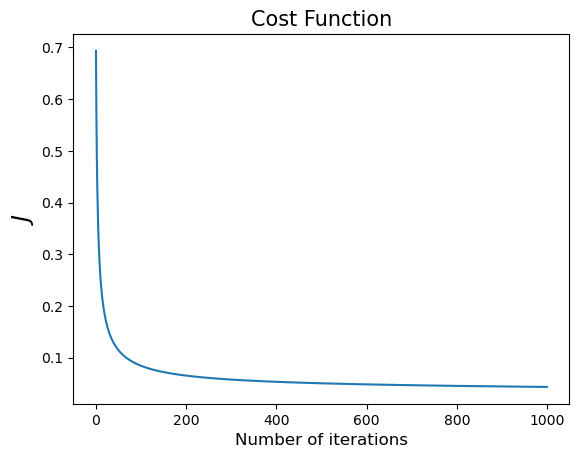

In [107]:
plt.plot(logreg.cost_list)
plt.title("Cost Function",fontsize = 15)
plt.xlabel("Number of iterations", fontsize = 12)
plt.ylabel("$J$", fontsize = 17)
plt.show()

In [108]:
print(X.shape)

(200, 2)


In [109]:
logreg.weights

array([[0.20040814],
       [0.99448814]])

In [110]:
logreg.bias

0.2608442373154321

In [111]:
predictions = logreg.predict(X)

In [112]:
acc = logreg.calculate_accuracy(y, predictions)
print(f'We obtained an accuracy of {acc:.3f}')

We obtained an accuracy of 0.985


Finally, let's check the decision boundary for a threshold of 0.5.

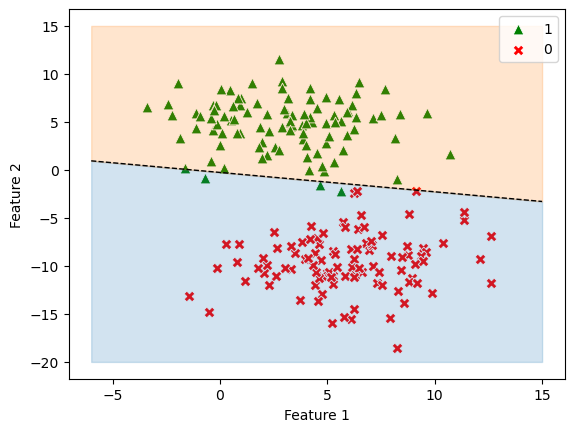

In [120]:
# Your existing code for plotting the data points
class1 = (y == 1).reshape(-1, 1)
class0 = (y == 0).reshape(-1, 1)

ax = sns.scatterplot(x = X[class1[:, 0], 0],
                     y = X[class1[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = X[class0[:, 0], 0],
                y = X[class0[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="Feature 1", ylabel="Feature 2")
ax.legend(["1", "0"])

# Retrieve the model parameters.
b = logreg.bias
w1, w2 = logreg.weights
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the decision boundary.
xmin, xmax = -6, 15
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, -20, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, 15, color='tab:orange', alpha=0.2)

plt.show()